In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os, glob

In [2]:
work_dir = os.getcwd()
work_dir

'C:\\Users\\Evan\\Documents\\GitHub\\TXO_TX_Strategy'

In [22]:
res_path = os.path.join(work_dir, 'Output_Result', '20200427')
Data_path = os.path.join(work_dir, 'Data', 'TX00')
df_CPIV = pd.read_csv(os.path.join(res_path, 'CPIV_0313_0424.csv'), encoding = 'cp950')
TX = pd.read_csv(os.path.join(Data_path, 'TX_0424.csv'), encoding = 'cp950')
TX['日期'] = pd.to_datetime(TX['日期']) 
TX00 = TX.drop_duplicates(subset = ['日期'], keep = 'first').reset_index(drop=True)

In [23]:
df_CPIV.head()

,Date,OpenIntervalCPIV,CloseIntervalCPIV
0,20200313,-0.104693,0.051243
1,20200316,0.049534,0.231875
2,20200317,0.010671,0.797703
3,20200318,-0.082681,-0.358737
4,20200319,0.219467,-0.754708


In [31]:
df_CPIV.CloseIntervalCPIV.describe()

count    29.000000
mean      0.106096
std       0.331440
min      -0.754708
25%       0.051243
50%       0.115160
75%       0.231875
max       0.797703
Name: CloseIntervalCPIV, dtype: float64

## Plot the Graph first 

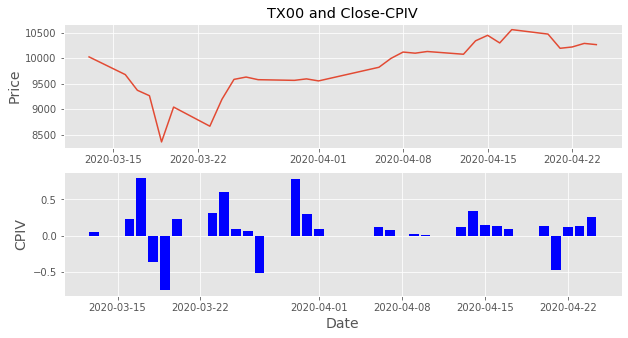

In [29]:
date = TX00['日期']
closePrice = TX00['每日結算價']
CPIV_Close = df_CPIV['CloseIntervalCPIV']
date1 = df_CPIV['Date']

plt.style.use('ggplot')
plt.figure(figsize=(10,5))

plt.subplot(211)
plt.plot(date, closePrice)

title_name = "TX00 and Close-CPIV" 
plt.title(title_name)
plt.ylabel('Price', fontsize=14)

plt.subplot(212)
plt.bar(date, CPIV_Close, color = 'blue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('CPIV', fontsize=14)

plt.savefig(os.path.join(work_dir, 'Graph', title_name))
plt.show()

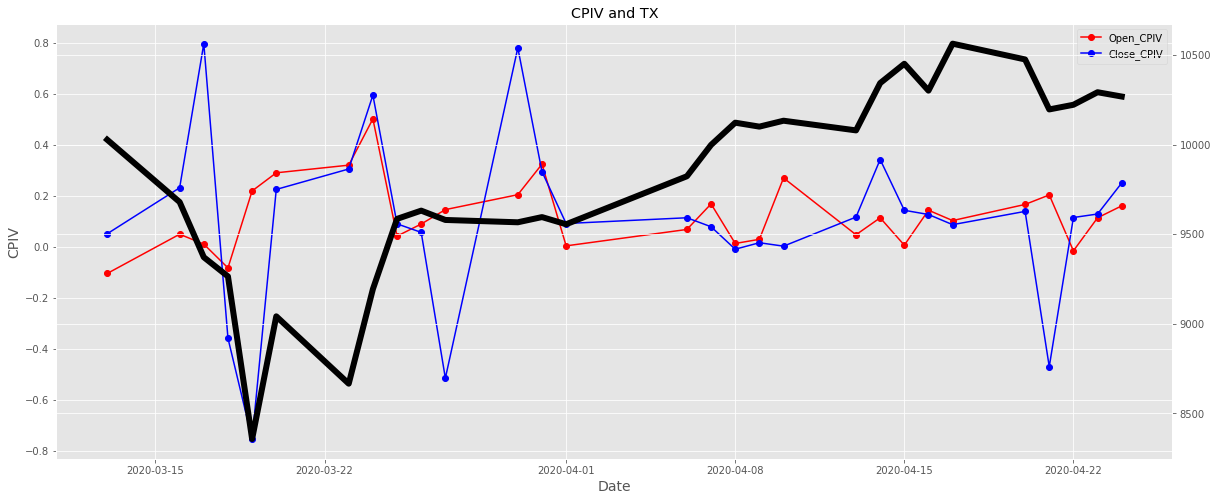

In [47]:
CPIV_Close = df_CPIV['CloseIntervalCPIV']
CPIV_Open = df_CPIV['OpenIntervalCPIV']
date1 = df_CPIV['Date']

plt.style.use('ggplot')

fig, ax1 = plt.subplots(figsize=(20, 8))

ax2 = ax1.twinx()

title_name = "CPIV and TX" 
ax1.set_title(title_name)
ax1.plot(date, CPIV_Open, color = 'red',  marker = "o", label = 'Open_CPIV')
ax1.plot(date, CPIV_Close, color = 'blue', marker = "o",  label = 'Close_CPIV')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('CPIV', fontsize=14)
ax1.legend()


ax2.plot(date, closePrice, label = 'TX',  color = 'black', linewidth = 6)

plt.savefig(os.path.join(work_dir, 'Graph', title_name))
plt.show()